In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from glob import glob
import imageio

In [ ]:
shape=(100,100,3)
batch_size=32

In [ ]:
vgg=keras.applications.vgg16.VGG16(include_top=False,input_shape=shape)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
flatten_layer=keras.layers.Flatten()
dense_layer=keras.layers.Dense(4,activation="sigmoid")

In [ ]:
x=flatten_layer(vgg.output)
x=dense_layer(x)
model=keras.Model(vgg.input,x)

In [ ]:
model.compile(optimizer="adam",loss=keras.losses.binary_crossentropy,metrics=["accuracy"])

In [ ]:
def generator():
  while True:
    for _ in range(50):
      x=np.zeros((batch_size,shape[0],shape[1],shape[2]))
      y=np.zeros((batch_size,4))
      for i in range(batch_size):
        row0=np.random.randint(0,shape[0]-10)
        col0=np.random.randint(0,shape[1]-10)
        row1=np.random.randint(shape[0]-10,shape[0])
        col1=np.random.randint(shape[1]-10,shape[1])
        x[i,row0:row1,col0:col1,:]=1
        y[i,0]=row0/100
        y[i,1]=col0/100
        y[i,2]=(row1-row0)/100
        y[i,3]=(col1-col0)/100
      yield x,y

In [ ]:
model.fit_generator(generator(),epochs=20,steps_per_epoch=50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


50/50 [==============================] - 19s 99ms/step - loss: 0.7165 - accuracy: 0.2519
Epoch 2/20
50/50 [==============================] - 5s 99ms/step - loss: 0.5909 - accuracy: 0.6888
Epoch 3/20
50/50 [==============================] - 5s 99ms/step - loss: 0.5421 - accuracy: 0.9219
Epoch 4/20
50/50 [==============================] - 5s 99ms/step - loss: 0.5392 - accuracy: 0.9337
Epoch 5/20
50/50 [==============================] - 5s 100ms/step - loss: 0.5434 - accuracy: 0.9356
Epoch 6/20
50/50 [==============================] - 5s 100ms/step - loss: 0.5413 - accuracy: 0.9356
Epoch 7/20
50/50 [==============================] - 5s 100ms/step - loss: 0.5373 - accuracy: 0.9450
Epoch 8/20
50/50 [==============================] - 5s 100ms/step - loss: 0.5436 - accuracy: 0.9456
Epoch 9/20
50/50 [==============================] - 5s 100ms/step - loss: 0.5403 - accuracy: 0.9325
Epoch 10/20
50/50 [==============================] - 5s 101ms/step - loss: 0.5405 - accuracy: 0.9369
Epoch 11/20
5

In [ ]:
def plot_white_boxes_location():

  x=np.zeros(shape)
  row0=np.random.randint(0,shape[0]-10)
  col0=np.random.randint(0,shape[1]-10)
  row1=np.random.randint(shape[0]-10,shape[0])
  col1=np.random.randint(shape[1]-10,shape[1])
  x[row0:row1,col0:col1,:]=1
  predict_=model.predict(np.array([x]))
  predict_=predict_[0]
  predict_[0]=predict_[0]*shape[0]
  predict_[1]=predict_[1]*shape[1]
  predict_[2]=predict_[2]*shape[0]
  predict_[3]=predict_[3]*shape[1]
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.imshow(x)
 
  rect = patches.Rectangle((predict_[1],predict_[0]),  predict_[3],predict_[2], linewidth=4, edgecolor='r')


  ax.add_patch(rect)

  plt.show()

  


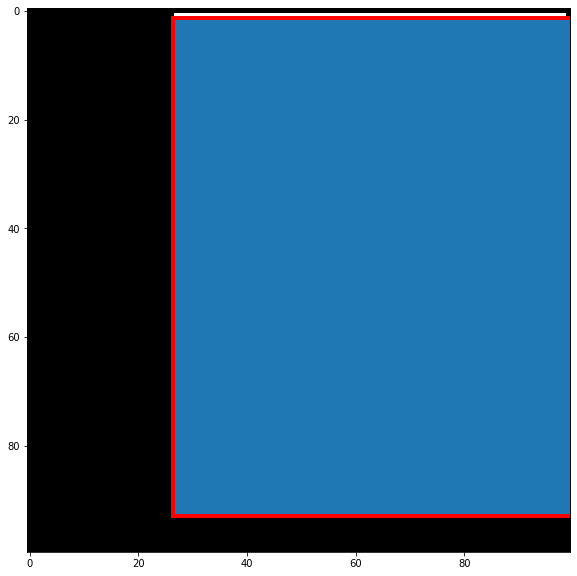

In [ ]:

plot_white_boxes_location()

In [ ]:
image = keras.preprocessing.image.load_img("/content/pokemon.jpg", target_size=(28,28,3))
input_arr = keras.preprocessing.image.img_to_array(image)/255


In [ ]:
def generatorV2():
  while True:
    for _ in range(50):
      x=np.zeros((batch_size,shape[0],shape[1],shape[2]))
      y=np.zeros((batch_size,4))
      for i in range(batch_size):
        row0=np.random.randint(0,shape[0]-input_arr.shape[0])
        col0=np.random.randint(0,shape[1]-input_arr.shape[1])
        row1=row0+input_arr.shape[0]
        col1=col0+input_arr.shape[1]
        x[i,row0:row1,col0:col1,:]=input_arr
        y[i,0]=row0/100
        y[i,1]=col0/100
        y[i,2]=(row1-row0)/100
        y[i,3]=(col1-col0)/100
      yield x,y

In [ ]:
model.fit_generator(generatorV2(),epochs=20,steps_per_epoch=50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


50/50 [==============================] - 19s 101ms/step - loss: 0.8709 - accuracy: 0.5231
Epoch 2/20
50/50 [==============================] - 5s 101ms/step - loss: 0.5713 - accuracy: 0.8706
Epoch 3/20
50/50 [==============================] - 5s 102ms/step - loss: 0.5672 - accuracy: 0.9038
Epoch 4/20
50/50 [==============================] - 5s 102ms/step - loss: 0.5701 - accuracy: 0.9200
Epoch 5/20
50/50 [==============================] - 5s 103ms/step - loss: 0.5679 - accuracy: 0.9050
Epoch 6/20
50/50 [==============================] - 5s 102ms/step - loss: 0.5665 - accuracy: 0.9013
Epoch 7/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5682 - accuracy: 0.9131
Epoch 8/20
50/50 [==============================] - 5s 106ms/step - loss: 0.5675 - accuracy: 0.8975
Epoch 9/20
50/50 [==============================] - 5s 104ms/step - loss: 0.5691 - accuracy: 0.9156
Epoch 10/20
50/50 [==============================] - 5s 103ms/step - loss: 0.5688 - accuracy: 0.9056
Epoch 11/

In [ ]:
def plot_white_boxes_locationV2():
  x=np.zeros(shape)
  row0=np.random.randint(0,shape[0]-input_arr.shape[0])
  col0=np.random.randint(0,shape[1]-input_arr.shape[1])
  row1=row0+input_arr.shape[0]
  col1=col0+input_arr.shape[1]
  x[row0:row1,col0:col1,:]=input_arr
  predict_=model.predict(np.array([x]))
  predict_=predict_[0]
  predict_[0]=predict_[0]*shape[0]
  predict_[1]=predict_[1]*shape[1]
  predict_[2]=predict_[2]*shape[0]
  predict_[3]=predict_[3]*shape[1]
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.imshow(keras.preprocessing.image.array_to_img( x))
 
  rect = patches.Rectangle((predict_[1],predict_[0]),  predict_[3],predict_[2], linewidth=4, edgecolor='r',fill=False)


  ax.add_patch(rect)

  plt.show()

  


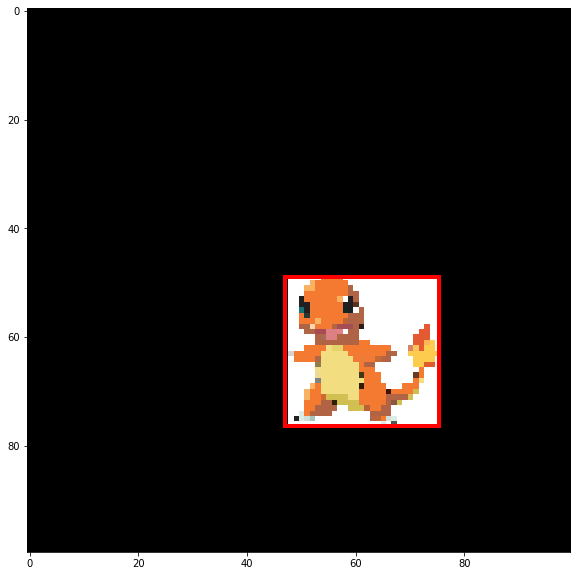

In [ ]:
plot_white_boxes_locationV2()

In [ ]:
def generatorV3():
  while True:
    for _ in range(50):
      x=np.zeros((batch_size,shape[0],shape[1],shape[2]))
      y=np.zeros((batch_size,4))
      scale=np.random.uniform(0.5,1.5)
      input_arr_resized=np.resize(input_arr,(int(input_arr.shape[0]*scale),int(input_arr.shape[1]*scale),3))
      for i in range(batch_size):
        row0=np.random.randint(0,shape[0]-input_arr_resized.shape[0])
        col0=np.random.randint(0,shape[1]-input_arr_resized.shape[1])
        row1=row0+input_arr_resized.shape[0]
        col1=col0+input_arr_resized.shape[1]
        x[i,row0:row1,col0:col1,:]=input_arr_resized
        y[i,0]=row0/100
        y[i,1]=col0/100
        y[i,2]=(row1-row0)/100
        y[i,3]=(col1-col0)/100
      yield x,y

In [ ]:
model.fit_generator(generatorV3(),epochs=20,steps_per_epoch=50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


50/50 [==============================] - 20s 105ms/step - loss: 1.8256 - accuracy: 0.4462
Epoch 2/20
50/50 [==============================] - 5s 104ms/step - loss: 0.5579 - accuracy: 0.8431
Epoch 3/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5692 - accuracy: 0.7588
Epoch 4/20
50/50 [==============================] - 5s 106ms/step - loss: 0.5672 - accuracy: 0.7925
Epoch 5/20
50/50 [==============================] - 5s 106ms/step - loss: 0.5595 - accuracy: 0.8138
Epoch 6/20
50/50 [==============================] - 5s 108ms/step - loss: 0.5596 - accuracy: 0.8225
Epoch 7/20
50/50 [==============================] - 5s 108ms/step - loss: 0.5610 - accuracy: 0.8431
Epoch 8/20
50/50 [==============================] - 5s 107ms/step - loss: 0.5530 - accuracy: 0.8813
Epoch 9/20
50/50 [==============================] - 5s 107ms/step - loss: 0.5683 - accuracy: 0.8500
Epoch 10/20
50/50 [==============================] - 5s 106ms/step - loss: 0.5557 - accuracy: 0.8450
Epoch 11/

In [ ]:
def plot_white_boxes_locationV3():
  x=np.zeros(shape)
  scale=np.random.uniform(0.5,1.5)
  input_arr_resized=np.resize(input_arr,(int(input_arr.shape[0]*scale),int(input_arr.shape[1]*scale),3))
  row0=np.random.randint(0,shape[0]-input_arr_resized.shape[0])
  col0=np.random.randint(0,shape[1]-input_arr_resized.shape[1])
  row1=row0+input_arr_resized.shape[0]
  col1=col0+input_arr_resized.shape[1]
  x[row0:row1,col0:col1,:]=input_arr_resized
  predict_=model.predict(np.array([x]))
  predict_=predict_[0]
  predict_[0]=predict_[0]*shape[0]
  predict_[1]=predict_[1]*shape[1]
  predict_[2]=predict_[2]*shape[0]
  predict_[3]=predict_[3]*shape[1]
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.imshow(keras.preprocessing.image.array_to_img( x))
 
  rect = patches.Rectangle((predict_[1],predict_[0]),  predict_[3],predict_[2], linewidth=4, edgecolor='r',fill=False)


  ax.add_patch(rect)

  plt.show()

  


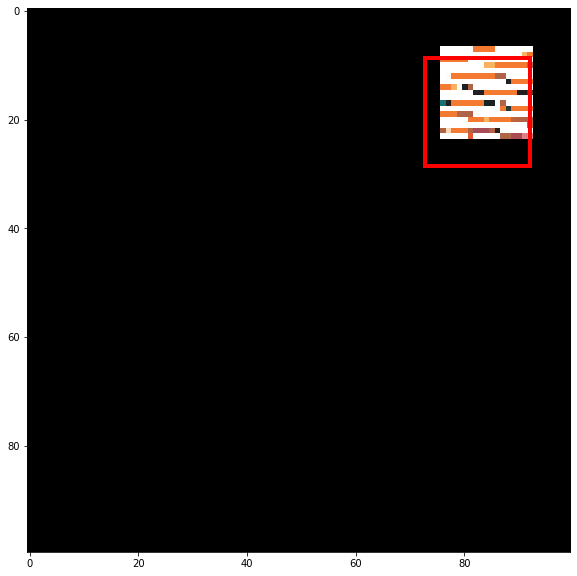

In [ ]:
plot_white_boxes_locationV3()

In [ ]:
def generatorV4():
  while True:
    for _ in range(50):
      x=np.zeros((batch_size,shape[0],shape[1],shape[2]))
      y=np.zeros((batch_size,4))
      scale=np.random.uniform(0.5,1.5)
      input_arr_resized=np.resize(input_arr,(int(input_arr.shape[0]*scale),int(input_arr.shape[1]*scale),3))
      to_flip=np.random.random()
      if to_flip <0.5:
        input_arr_resized=np.fliplr(input_arr_resized)
      for i in range(batch_size):
        row0=np.random.randint(0,shape[0]-input_arr_resized.shape[0])
        col0=np.random.randint(0,shape[1]-input_arr_resized.shape[1])
        row1=row0+input_arr_resized.shape[0]
        col1=col0+input_arr_resized.shape[1]
        x[i,row0:row1,col0:col1,:]=input_arr_resized
        y[i,0]=row0/100
        y[i,1]=col0/100
        y[i,2]=(row1-row0)/100
        y[i,3]=(col1-col0)/100
      yield x,y

In [ ]:
model.fit_generator(generatorV4(),epochs=20,steps_per_epoch=50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


50/50 [==============================] - 19s 106ms/step - loss: 1.2555 - accuracy: 0.6338
Epoch 2/20
50/50 [==============================] - 5s 106ms/step - loss: 0.5650 - accuracy: 0.7869
Epoch 3/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5642 - accuracy: 0.8219
Epoch 4/20
50/50 [==============================] - 5s 106ms/step - loss: 0.5577 - accuracy: 0.8200
Epoch 5/20
50/50 [==============================] - 5s 107ms/step - loss: 0.5558 - accuracy: 0.8838
Epoch 6/20
50/50 [==============================] - 5s 109ms/step - loss: 0.5612 - accuracy: 0.8844
Epoch 7/20
50/50 [==============================] - 5s 109ms/step - loss: 0.5496 - accuracy: 0.8681
Epoch 8/20
50/50 [==============================] - 5s 108ms/step - loss: 0.5589 - accuracy: 0.8800
Epoch 9/20
50/50 [==============================] - 5s 106ms/step - loss: 0.5576 - accuracy: 0.8506
Epoch 10/20
50/50 [==============================] - 5s 106ms/step - loss: 0.5567 - accuracy: 0.8581
Epoch 11/

In [ ]:
def plot_white_boxes_locationV4():
  x=np.zeros(shape)
  scale=np.random.uniform(0.5,1.5)
  input_arr_resized=np.resize(input_arr,(int(input_arr.shape[0]*scale),int(input_arr.shape[1]*scale),3))
  to_flip=np.random.random()
  if to_flip <0.5:
    input_arr_resized=np.fliplr(input_arr_resized)
  row0=np.random.randint(0,shape[0]-input_arr_resized.shape[0])
  col0=np.random.randint(0,shape[1]-input_arr_resized.shape[1])
  row1=row0+input_arr_resized.shape[0]
  col1=col0+input_arr_resized.shape[1]
  x[row0:row1,col0:col1,:]=input_arr_resized
  predict_=model.predict(np.array([x]))
  predict_=predict_[0]
  predict_[0]=predict_[0]*shape[0]
  predict_[1]=predict_[1]*shape[1]
  predict_[2]=predict_[2]*shape[0]
  predict_[3]=predict_[3]*shape[1]
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.imshow(keras.preprocessing.image.array_to_img( x))
 
  rect = patches.Rectangle((predict_[1],predict_[0]),  predict_[3],predict_[2], linewidth=4, edgecolor='r',fill=False)


  ax.add_patch(rect)

  plt.show()

  


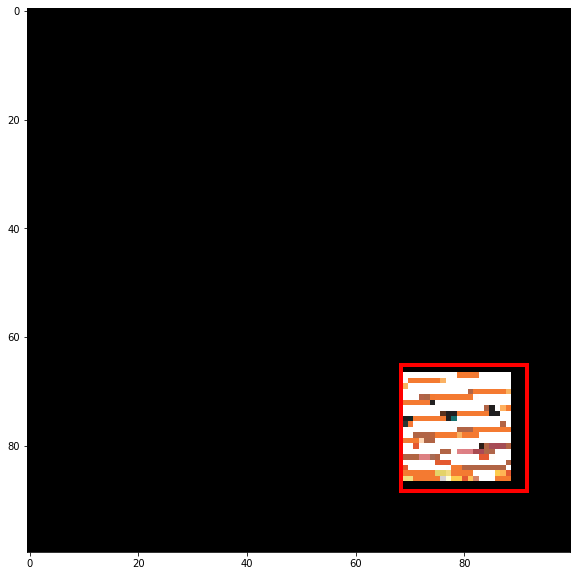

In [ ]:
plot_white_boxes_locationV4()

In [ ]:
backgrounds=[]
background_files=glob("/content/drive/MyDrive/background/background*.jpg")
for f in background_files:
  backgrounds.append(np.array(keras.preprocessing.image.load_img(f)))

In [ ]:
from skimage.transform import rescale
# img=keras.preprocessing.image.load_img("/content/pokemon.png")
# input_arr=keras.preprocessing.image.img_to_array(img)
input_arr=imageio.imread("/content/pokemon.png")
print(input_arr.shape)
input_arr=rescale(input_arr,0.07,preserve_range=True,multichannel=True)



(859, 840, 4)


In [ ]:
def generatorV5():
  while True:
    for _ in range(50):
      x=np.zeros((batch_size,shape[0],shape[1],shape[2]))
      y=np.zeros((batch_size,4))
    
      # scale=np.random.uniform(0.5,1.5)
      # input_arr_resized=np.resize(input_arr,(int(input_arr.shape[0]*scale),int(input_arr.shape[1]*scale),3))
      # to_flip=np.random.random()
      # if to_flip <0.5:
      #   input_arr_resized=np.fliplr(input_arr_resized)
      for i in range(batch_size):
        id=np.random.choice(len(backgrounds))
        bg=backgrounds[id]
        bg_h,bg_w,_=bg.shape
        rnd_h=np.random.randint(bg_h-shape[0])
        rnd_w=np.random.randint(bg_w-shape[1])
        
        x[i]=bg[rnd_h:rnd_h+shape[0],rnd_w:rnd_w+shape[1]].copy()

        scale=np.random.uniform(0.5,1.5)
        input_arr_resized=np.resize(input_arr,(int(input_arr.shape[0]*scale),int(input_arr.shape[1]*scale),4)
        ).astype(np.uint8)
        to_flip=np.random.random()
        if to_flip <0.5:
           input_arr_resized=np.fliplr(input_arr_resized)

        row0=np.random.randint(0,shape[0]-input_arr_resized.shape[0])
        col0=np.random.randint(0,shape[1]-input_arr_resized.shape[1])
        row1=row0+input_arr_resized.shape[0]
        col1=col0+input_arr_resized.shape[1]
        mask=(input_arr_resized[:,:,3]==0)

        bg_slice=x[i,row0:row1,col0:col1,:]
        bg_slice=np.expand_dims(mask,-1)*bg_slice
        bg_slice+=input_arr_resized[:,:,:3]
        x[i,row0:row1,col0:col1,:]=bg_slice
        y[i,0]=row0/100
        y[i,1]=col0/100
        y[i,2]=(row1-row0)/100
        y[i,3]=(col1-col0)/100
      yield x/255,y

In [ ]:
model.fit_generator(generatorV5(),epochs=20,steps_per_epoch=50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


50/50 [==============================] - 5s 103ms/step - loss: 0.5292 - accuracy: 0.7756
Epoch 2/20
50/50 [==============================] - 5s 102ms/step - loss: 0.5210 - accuracy: 0.8819
Epoch 3/20
50/50 [==============================] - 5s 103ms/step - loss: 0.5175 - accuracy: 0.9125
Epoch 4/20
50/50 [==============================] - 5s 104ms/step - loss: 0.5212 - accuracy: 0.9212
Epoch 5/20
50/50 [==============================] - 5s 104ms/step - loss: 0.5189 - accuracy: 0.9475
Epoch 6/20
50/50 [==============================] - 5s 104ms/step - loss: 0.5207 - accuracy: 0.9506
Epoch 7/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5187 - accuracy: 0.9594
Epoch 8/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5204 - accuracy: 0.9569
Epoch 9/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5173 - accuracy: 0.9625
Epoch 10/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5215 - accuracy: 0.9631
Epoch 11/2

In [ ]:
def plot_white_boxes_locationV5():
  x=np.zeros(shape)
  id=np.random.choice(len(backgrounds))
  bg=backgrounds[id].astype(np.uint8)
  bg_h,bg_w,_=bg.shape
  rnd_h=np.random.randint(bg_h-shape[0])
  rnd_w=np.random.randint(bg_w-shape[1])
        
  x=bg[rnd_h:rnd_h+shape[0],rnd_w:rnd_w+shape[1]].copy()
  scale=np.random.uniform(0.5,1.5)
  input_arr_resized=np.resize(input_arr,(int(input_arr.shape[0]*scale),int(input_arr.shape[1]*scale),4)).astype(np.uint8)
  to_flip=np.random.random()
  if to_flip <0.5:
    input_arr_resized=np.fliplr(input_arr_resized)
  row0=np.random.randint(0,shape[0]-input_arr_resized.shape[0])
  col0=np.random.randint(0,shape[1]-input_arr_resized.shape[1])
  row1=row0+input_arr_resized.shape[0]
  col1=col0+input_arr_resized.shape[1]
  mask=(input_arr_resized[:,:,3]==0)

  bg_slice=x[row0:row1,col0:col1,:]
  bg_slice=np.expand_dims(mask,-1)*bg_slice
  bg_slice+=input_arr_resized[:,:,:3]
  x[row0:row1,col0:col1,:]=bg_slice
 
  predict_=model.predict(np.array([x/255]))
  predict_=predict_[0]
  predict_[0]=predict_[0]*shape[0]
  predict_[1]=predict_[1]*shape[1]
  predict_[2]=predict_[2]*shape[0]
  predict_[3]=predict_[3]*shape[1]
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.imshow(keras.preprocessing.image.array_to_img( x/255))
 
  rect = patches.Rectangle((predict_[1],predict_[0]),  predict_[3],predict_[2], linewidth=4, edgecolor='r',fill=False)


  ax.add_patch(rect)

  plt.show()

  


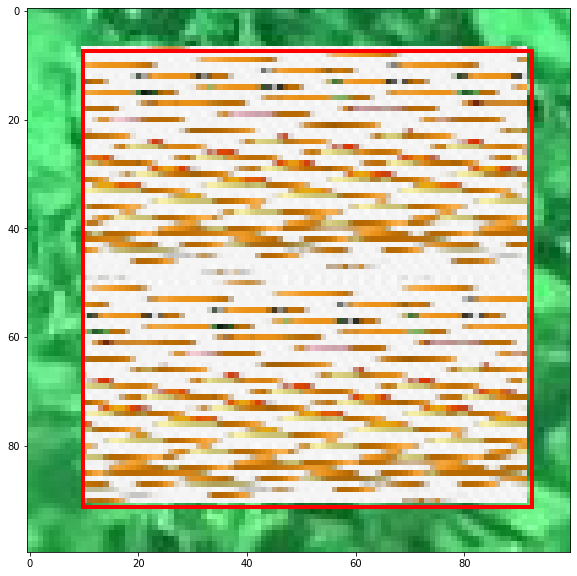

In [ ]:
plot_white_boxes_locationV5()

In [ ]:
def custom_loss(y_true,y_pred):
  bce=keras.losses.binary_crossentropy(y_true[:,:-1],y_pred[:,:-1])
  bce2=keras.losses.binary_crossentropy(y_true[:,-1],y_pred[:,-1])
  return 2*y_true[:,-1]*bce+0.5*bce2

In [ ]:
flatten_layer2=keras.layers.Flatten()
dense_layer2=keras.layers.Dense(5,activation="sigmoid")

In [ ]:
x=flatten_layer2(vgg.output)
x=dense_layer2(x)
model=keras.Model(vgg.input,x)

In [ ]:
model.compile(optimizer="adam",loss=custom_loss,metrics=["accuracy"])

In [ ]:
def generatorV6():
  while True:
    for _ in range(50):
      x=np.zeros((batch_size,shape[0],shape[1],shape[2]))
      y=np.zeros((batch_size,5))
    
      # scale=np.random.uniform(0.5,1.5)
      # input_arr_resized=np.resize(input_arr,(int(input_arr.shape[0]*scale),int(input_arr.shape[1]*scale),3))
      # to_flip=np.random.random()
      # if to_flip <0.5:
      #   input_arr_resized=np.fliplr(input_arr_resized)
      for i in range(batch_size):
        id=np.random.choice(len(backgrounds))
        bg=backgrounds[id]
        bg_h,bg_w,_=bg.shape
        rnd_h=np.random.randint(bg_h-shape[0])
        rnd_w=np.random.randint(bg_w-shape[1])
        
        x[i]=bg[rnd_h:rnd_h+shape[0],rnd_w:rnd_w+shape[1]].copy()
        have_obj=np.random.random()
        if have_obj <0.5:
          y[i,0]=0
          y[i,1]=0
          y[i,2]=0
          y[i,3]=0
          y[i,4]=0
        else:  
          scale=np.random.uniform(0.5,1.5)
          input_arr_resized=np.resize(input_arr,(int(input_arr.shape[0]*scale),int(input_arr.shape[1]*scale),4)
          ).astype(np.uint8)
          to_flip=np.random.random()
          if to_flip <0.5:
            input_arr_resized=np.fliplr(input_arr_resized)

          row0=np.random.randint(0,shape[0]-input_arr_resized.shape[0])
          col0=np.random.randint(0,shape[1]-input_arr_resized.shape[1])
          row1=row0+input_arr_resized.shape[0]
          col1=col0+input_arr_resized.shape[1]
          mask=(input_arr_resized[:,:,3]==0)

          bg_slice=x[i,row0:row1,col0:col1,:]
          bg_slice=np.expand_dims(mask,-1)*bg_slice
          bg_slice+=input_arr_resized[:,:,:3]
          x[i,row0:row1,col0:col1,:]=bg_slice
          y[i,0]=row0/100
          y[i,1]=col0/100
          y[i,2]=(row1-row0)/100
          y[i,3]=(col1-col0)/100
          y[i,4]=1
      yield x/255,y

In [ ]:
model.fit_generator(generatorV6(),epochs=20,steps_per_epoch=50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


50/50 [==============================] - 20s 102ms/step - loss: 0.8269 - accuracy: 0.3831
Epoch 2/20
50/50 [==============================] - 5s 103ms/step - loss: 0.5356 - accuracy: 0.9925
Epoch 3/20
50/50 [==============================] - 5s 102ms/step - loss: 0.5066 - accuracy: 0.8512
Epoch 4/20
50/50 [==============================] - 5s 103ms/step - loss: 0.5147 - accuracy: 0.4950
Epoch 5/20
50/50 [==============================] - 5s 103ms/step - loss: 0.5053 - accuracy: 0.4856
Epoch 6/20
50/50 [==============================] - 5s 104ms/step - loss: 0.5353 - accuracy: 0.5169
Epoch 7/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5187 - accuracy: 0.5000
Epoch 8/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5183 - accuracy: 0.5019
Epoch 9/20
50/50 [==============================] - 5s 105ms/step - loss: 0.5373 - accuracy: 0.5169
Epoch 10/20
50/50 [==============================] - 5s 106ms/step - loss: 0.5048 - accuracy: 0.4919
Epoch 11/

In [ ]:
def plot_white_boxes_locationV6():
  x=np.zeros(shape)
  id=np.random.choice(len(backgrounds))
  bg=backgrounds[id].astype(np.uint8)
  bg_h,bg_w,_=bg.shape
  rnd_h=np.random.randint(bg_h-shape[0])
  rnd_w=np.random.randint(bg_w-shape[1])
        
  x=bg[rnd_h:rnd_h+shape[0],rnd_w:rnd_w+shape[1]].copy()
  have_obj=np.random.random()
  
  if have_obj>=0.5:  
    scale=np.random.uniform(0.5,1.5)
    input_arr_resized=np.resize(input_arr,(int(input_arr.shape[0]*scale),int(input_arr.shape[1]*scale),4)).astype(np.uint8)
    to_flip=np.random.random()
    if to_flip <0.5:
      input_arr_resized=np.fliplr(input_arr_resized)
    row0=np.random.randint(0,shape[0]-input_arr_resized.shape[0])
    col0=np.random.randint(0,shape[1]-input_arr_resized.shape[1])
    row1=row0+input_arr_resized.shape[0]
    col1=col0+input_arr_resized.shape[1]
    mask=(input_arr_resized[:,:,3]==0)

    bg_slice=x[row0:row1,col0:col1,:]
    bg_slice=np.expand_dims(mask,-1)*bg_slice
    bg_slice+=input_arr_resized[:,:,:3]
    x[row0:row1,col0:col1,:]=bg_slice
 
  predict_=model.predict(np.array([x/255]))
  predict_=predict_[0]
  predict_[0]=predict_[0]*shape[0]
  predict_[1]=predict_[1]*shape[1]
  predict_[2]=predict_[2]*shape[0]
  predict_[3]=predict_[3]*shape[1]
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.imshow(keras.preprocessing.image.array_to_img( x/255))
  if predict_[4]>0.5:
    rect = patches.Rectangle((predict_[1],predict_[0]),  predict_[3],predict_[2], linewidth=4, edgecolor='r',fill=False)


    ax.add_patch(rect)

  plt.show()

  


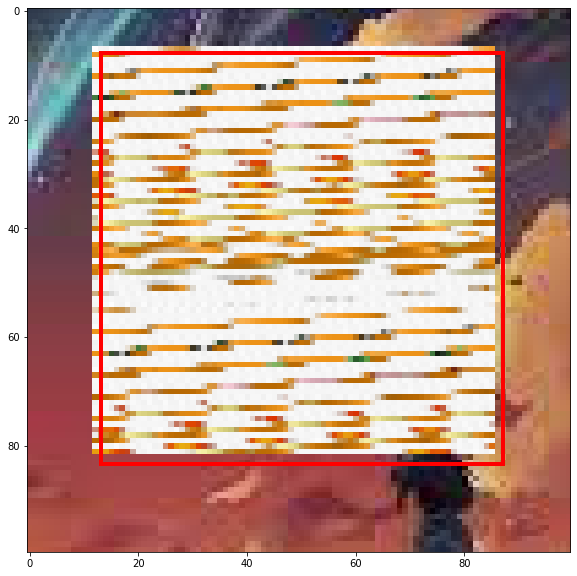

In [ ]:
plot_white_boxes_locationV6()